<a href="https://colab.research.google.com/github/eldorjonneymatov/mdev_ds_pract/blob/main/machine_learning/crisp_dm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

# Analitik yondashuv
Vazifa yangi uylar uchun narx belgilash, demak regressiya modelidan foydalaniladi.

# Ma`lumotlarga nazar solamiz

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

location       district  rooms  \
0  город Ташкент, Юнусабадский район, Юнусабад 8-...   Юнусабадский      3   
1  город Ташкент, Яккасарайский район, 1-й тупик ...  Яккасарайский      2   
2  город Ташкент, Чиланзарский район, Чиланзар 2-...   Чиланзарский      2   
3  город Ташкент, Чиланзарский район, Чиланзар 9-...   Чиланзарский      3   
4  город Ташкент, Чиланзарский район, площадь Актепа   Чиланзарский      3   

  size  level  max_levels  price  
0   57      4           4  52000  
1   52      4           5  56000  
2   42      4           4  37000  
3   65      1           4  49500  
4   70      3           5  55000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df.district.value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

In [ ]:
len(df.location.unique())

1600

In [ ]:
df.location.head(10)

0    город Ташкент, Юнусабадский район, Юнусабад 8-...
1    город Ташкент, Яккасарайский район, 1-й тупик ...
2    город Ташкент, Чиланзарский район, Чиланзар 2-...
3    город Ташкент, Чиланзарский район, Чиланзар 9-...
4    город Ташкент, Чиланзарский район, площадь Актепа
5    город Ташкент, Чиланзарский район, Чиланзар 6-...
6       город Ташкент, Чиланзарский район, Чиланзар-16
7       город Ташкент, Яккасарайский район, Саламатина
8        город Ташкент, Учтепинский район, Чиланзар-21
9        город Ташкент, Чиланзарский район, Чиланзар-8
Name: location, dtype: object

In [ ]:
df.describe()

rooms        level   max_levels
count  7565.000000  7565.000000  7565.000000
mean      2.625644     3.699273     6.038202
std       1.085201     2.237275     2.613271
min       1.000000     1.000000     1.000000
25%       2.000000     2.000000     4.000000
50%       3.000000     3.000000     5.000000
75%       3.000000     5.000000     9.000000
max      10.000000    19.000000    25.000000

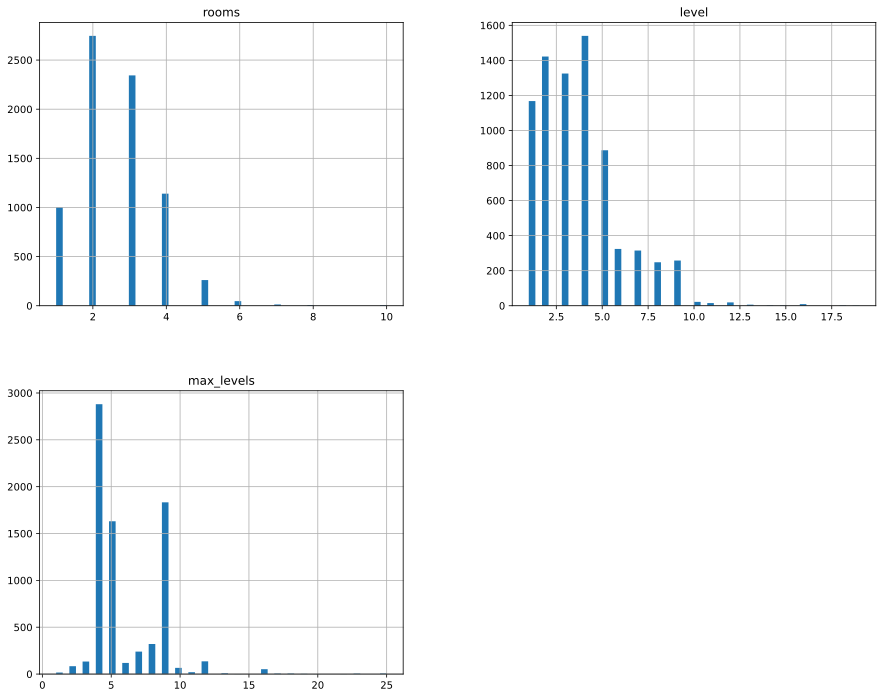

In [ ]:
df.hist(bins=50, figsize=(15,12))
plt.show()

### Ma`lumotlarni tahlil qilamiz
* `size` va `price` ustunidagi ma\`lumotlar sonli turda emas, ularni sonli turga o\`tkazish va keyin tahlil qilish kerak.
* `district` va `location` ustunida o\`xshash qiymatlar takrorlangan.
* `location` ustunidagi qiymatlar foydalanishga yaroqsiz holatda

# Ma`lumotlarga ishlov berish va tahlil qilish

In [ ]:
uylar = df.copy()

In [ ]:
uylar['size'].unique()

array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

`size` ustunida uy maydonining so\`zlar bilan ifodalangan qiymatlari ham mavjud ekan, ularni mos sonli qiymatlar bilan almashtirib ustun turini sonli `float` turiga o`zgartiramiz

In [ ]:
uylar.loc[df['size'] == 'Площадьземли:1сот', 'size'] = 100

In [ ]:
uylar['size'] = uylar['size'].astype(float)

In [ ]:
uylar.price.unique()

array(['52000', '56000', '37000', '49500', '55000', '25500', '21200',
       '20000', '26200', '22200', '24200', '30200', '22500', '32500',
       '45000', '47000', '49900', '76000', '65000', '47500', '30000',
       '32000', '44000', '56500', '35000', '23500', '60500', '68000',
       '41500', '52500', '43000', '80000', '42000', '23000', '88784',
       '97000', '28500', '34500', '51000', '48000', '40000', '67000',
       '40500', '54000', '36000', '63000', '63500', '70000', '91000',
       '83000', '19765', '50000', '86000', '31500', '26500', '14500',
       '27000', '59500', '47299', '38000', '29500', '61500', '46500',
       '58400', '26000', '105000', '53500', '12500', '107000', '39414',
       '60000', '49000', '18000', '42500', '45800', '24000', '58000',
       '55500', '31000', '41000', '50500', '13071', '45188', '53000',
       '25600', '35226', '36500', '142000', '85000', '110000', '69000',
       '28900', '34000', '25000', '39000', '125000', '28000', '43500',
       '39999',

`price` ustunida narxi nomalum bo\`lgan uylar uchun maxsus qiymatlar mavjud ekan ularni `nan` bilan almashtirib ustun turini `float`ga o`zgartiramiz

In [ ]:
uylar.loc[df.price == 'Договорная', 'price'] = np.nan

In [ ]:
uylar['price'] = uylar['price'].astype(float)

`Location` ustunidagi ma\`lumotlarni yaroqli holatga keltirishga urinib ko\`ramiz

In [ ]:
locations = uylar['location'].map(lambda x: x.split(','))

In [ ]:
lens = pd.Series([len(x) for x in locations])
lens.value_counts()

3    7479
4      43
2      30
5      12
6       1
dtype: int64

In [ ]:
def block_det(x):
  if len(x) < 3:
    return np.nan
  else:
    return x[2]
city = locations.map(lambda x: x[0])
district = locations.map(lambda x: x[1])
block = locations.map(block_det)

In [ ]:
city.value_counts()

город Ташкент    7565
Name: location, dtype: int64

In [ ]:
district.value_counts()

 Чиланзарский район         1641
 Мирзо-Улугбекский район    1382
 Юнусабадский район          883
 Учтепинский район           880
 Мирабадский район           773
 Яккасарайский район         658
 Яшнободский район           484
 Шайхантахурский район       396
 Олмазорский район           269
 Сергелийский район          175
 Янгихаётский район           16
 Бектемирский район            8
Name: location, dtype: int64

In [ ]:
block.head(10)

0         Юнусабад 8-й квартал
1     1-й тупик Шота Руставели
2         Чиланзар 2-й квартал
3         Чиланзар 9-й квартал
4               площадь Актепа
5         Чиланзар 6-й квартал
6                  Чиланзар-16
7                   Саламатина
8                  Чиланзар-21
9                   Чиланзар-8
Name: location, dtype: object

In [ ]:
len(block.unique())

1502

In [ ]:
!pip install geopandas
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myGeocode')

In [ ]:
location = geolocator.geocode('Ташкент, Юнусабадский район, Юнусабад 8-й квартал', language='ru')
location.latitude, location.longitude


AttributeError: ignored

In [ ]:
location = geolocator.geocode('Ташкент, Чиланзарский район, Чиланзар-16', language='ru')
location.latitude, location.longitude

(41.2748145, 69.1998036)

Barcha joylashuvlar ham xarita orqali koordinatalarini topish uchun mos formatda emas va 1000 dan ortiq turli qiymatlar mavjud. Demak ularni qo\`lda mos formatga o`tkazib chiqish mushkul ish, buning uchun soha mutaxasislari yordamida mulohaza yuritgan holda maxsus texnologiyalardan foydalanish kerak. Hozir esa ushbu ustunni olib tashlaymiz.

In [ ]:
uylar.drop('location', axis=1, inplace=True)

In [ ]:
uylar.describe()

rooms          size        level   max_levels         price
count  7565.000000   7565.000000  7565.000000  7565.000000  7.466000e+03
mean      2.625644    113.267236     3.699273     6.038202  7.133421e+04
std       1.085201   1491.213517     2.237275     2.613271  6.405237e+05
min       1.000000      1.000000     1.000000     1.000000  2.000000e+00
25%       2.000000     50.000000     2.000000     4.000000  3.500000e+04
50%       3.000000     66.000000     3.000000     5.000000  4.650000e+04
75%       3.000000     86.000000     5.000000     9.000000  6.700000e+04
max      10.000000  70000.000000    19.000000    25.000000  5.200000e+07

In [ ]:
corr_matrix = uylar.corr()
corr_matrix

rooms      size     level  max_levels     price
rooms       1.000000  0.027875  0.133536    0.177717  0.056176
size        0.027875  1.000000 -0.011031   -0.011091  0.001106
level       0.133536 -0.011031  1.000000    0.591807 -0.003454
max_levels  0.177717 -0.011091  0.591807    1.000000  0.011168
price       0.056176  0.001106 -0.003454    0.011168  1.000000

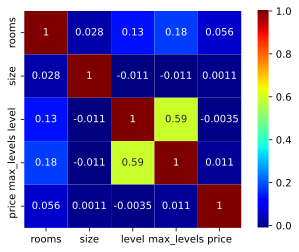

In [ ]:
sns.heatmap(data=corr_matrix, square=True, annot=True, cmap='jet')
plt.show()

`price` ustuni bilan hech bir ustun kuchli korrelyatsiyaga ega emas. `price` va `size` ustunidagi maksimal va minimal qiymatlar o\`rta qiymatga nisbatan katta farqga ega, chetki ba`zi qiymatlarni olib tashlash orqali xususiyatlar orasidagi munosabatni yaxshilaymiz.

In [ ]:
uylar.shape

(7565, 6)

In [ ]:
uylar2 = uylar[(uylar.price>5000) & (uylar.price < 1000000)]
uylar2.shape

(7449, 6)

In [ ]:
uylar= uylar2

In [ ]:
uylar2 = uylar[(uylar['size'] > 10) & (uylar['size'] < 1000)]
uylar2.shape

(7431, 6)

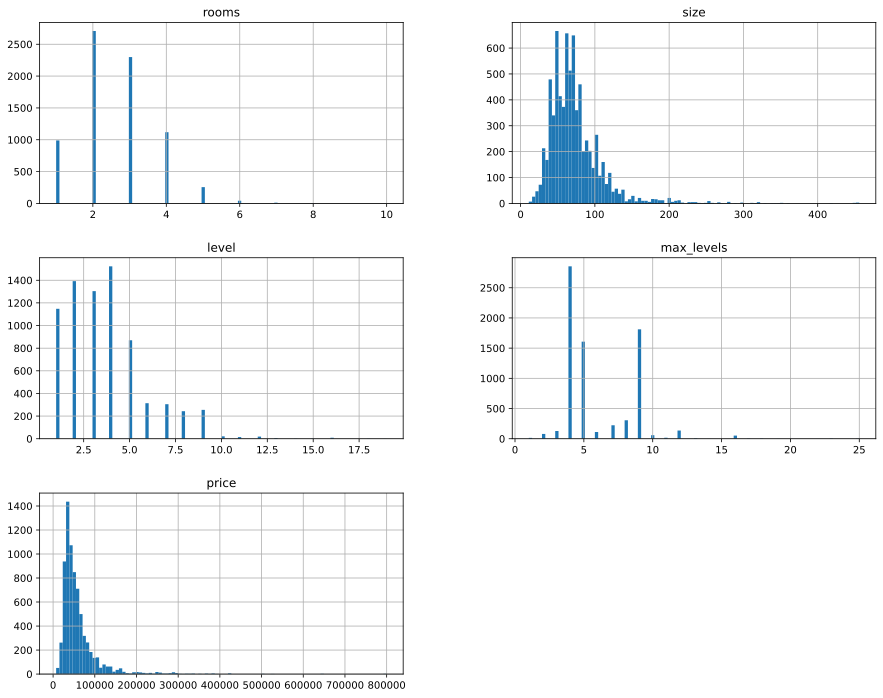

In [ ]:
uylar = uylar2
uylar.hist(bins=100, figsize=(15,12))
plt.show()

Korrelyatsiyalarni hisoblaymiz

In [ ]:
corr_matrix = uylar.corr()
corr_matrix

rooms      size     level  max_levels     price
rooms       1.000000  0.788122  0.140047    0.184721  0.553279
size        0.788122  1.000000  0.161176    0.275842  0.782014
level       0.140047  0.161176  1.000000    0.592741  0.059455
max_levels  0.184721  0.275842  0.592741    1.000000  0.219533
price       0.553279  0.782014  0.059455    0.219533  1.000000

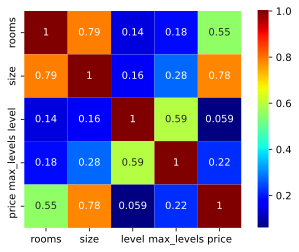

In [ ]:
sns.heatmap(data=corr_matrix, square=True, annot=True, cmap='jet')
plt.show()

In [ ]:
uylar.corrwith(uylar.price).sort_values(ascending=False)

price         1.000000
size          0.782014
rooms         0.553279
max_levels    0.219533
level         0.059455
dtype: float64

Endi `size` va `rooms` ustunlari bilan kuchli, `max_levels` ustuni bilan kuchsizroq korrelyatsiya hosil bo`ldi.

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(2, 2, 1)
sns.scatterplot(data = uylar, x = 'size', y = 'price')
plt.subplot(2, 2, 2)
sns.scatterplot(data = uylar, x = 'rooms', y = 'price')
plt.subplot(2, 2, 3)
sns.scatterplot(data = uylar, x = 'max_levels', y = 'price')
plt.subplot(2, 2, 4)
sns.scatterplot(data = uylar, x = 'level', y = 'price')
plt.show()

# Ma`lumotlarni ML algoritmlari uchun tayyorlash

In [ ]:
df = uylar.copy()

### Ma\`lumotlarni train va test to\`plamlarga ajratamiz

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 11, stratify = None)

In [ ]:
uylar = train_set.drop('price', axis = 1)
uylar_labels = train_set['price'].copy()

In [ ]:
uylar_num = uylar.drop('district', axis=1)
uylar_cat = uylar[['district']].copy()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [ ]:
X = imputer.fit_transform(uylar_num)

In [ ]:
uylar_tr = pd.DataFrame(X, index = uylar_num.index, columns = uylar_num.columns)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
uylar_cat_encoded = ordinal_encoder.fit_transform(uylar_cat)

In [ ]:
uylar_cat_encoded[:5]

array([[ 2.],
       [ 6.],
       [11.],
       [ 6.],
       [ 9.]])

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit_transform(uylar_tr)

array([[ 0.3565869 ,  0.80908105,  0.13659464,  1.13076526],
       [-1.50839553, -1.27763464, -0.75415526, -0.77868608],
       [-1.50839553, -0.62722975, -0.75415526,  1.13076526],
       ...,
       [ 0.3565869 , -0.08522567,  0.13659464, -0.77868608],
       [-0.57590432, -0.35622771, -0.30878031, -0.77868608],
       [-0.57590432, -0.24782689, -1.19953021, -0.39679581]])

### Barcha ishlarni bitta **pipeline**ga yig\`amiz

In [ ]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('std_scaler', StandardScaler()),
])
uylar_num_tr = num_pipeline.fit_transform(uylar_num)

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(uylar_num)
cat_attribs = list(uylar_cat)
full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attribs),
                                   ('cat', OrdinalEncoder(), cat_attribs),
])

In [ ]:
uylar_prepared = full_pipeline.fit_transform(uylar)

# Modelni tanlash va o\`rgatish

* Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(uylar_prepared, uylar_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
test_params = test_set.drop('price', axis=1)
test_labels = test_set['price'].copy()
test_set_prep = full_pipeline.fit_transform(test_params)
test_predictions = lr.predict(test_set_prep)
lin_mse = mean_squared_error(test_labels, test_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:",lin_rmse)
print("R-Squared:",lr.score(test_set_prep,test_labels))

RMSE: 26985.552677505886
R-Squared: 0.6774258224792787


* DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tr = DecisionTreeRegressor()
tr.fit(uylar_prepared, uylar_labels)

DecisionTreeRegressor()

In [ ]:
test_predictions = tr.predict(test_set_prep)
tree_mse = mean_squared_error(test_labels, test_predictions)
tree_rmse = np.sqrt(tree_mse)
print("RMSE:",tree_rmse)
print("R-Squared:",tr.score(test_set_prep,test_labels))

RMSE: 41573.23770165622
R-Squared: 0.23441280421275223


* Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(lr, uylar_prepared, uylar_labels, scoring='neg_mean_squared_error',cv=10)
lr_rmse_scores = np.sqrt(-scores)
print(lr_rmse_scores)
print("Mean:", lr_rmse_scores.mean())
print("Standard deviation:", lr_rmse_scores.std())

[24655.57969106 22317.53839854 38415.63062894 22569.04893067
 37270.35892948 25785.77403059 30120.29490775 32030.79046447
 22041.60556328 27362.8244492 ]
Mean: 28256.94459939946
Standard deviation: 5729.656475171561


In [ ]:
scores_tr = cross_val_score(tr, uylar_prepared, uylar_labels, scoring='neg_mean_squared_error',cv=10)
tr_rmse_scores = np.sqrt(-scores_tr)
print(tr_rmse_scores)
print("Mean:", tr_rmse_scores.mean())
print("Standard deviation:", tr_rmse_scores.std())

[28546.63827627 33619.00967591 31422.59864821 32152.33660102
 27765.08546182 27707.78719572 28874.30412858 33581.87612291
 24000.20654613 25555.46072472]
Mean: 29322.530338131422
Standard deviation: 3120.4765791664563


* Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
fr = RandomForestRegressor()
fr.fit(uylar_prepared, uylar_labels)

RandomForestRegressor()

In [ ]:
scores_fr = cross_val_score(fr, uylar_prepared, uylar_labels, scoring='neg_mean_squared_error',cv=10)
fr_rmse_scores = np.sqrt(-scores_fr)
print(fr_rmse_scores)
print('Mean:', fr_rmse_scores.mean())
print('Standard deviation:', fr_rmse_scores.std())

[20721.47755276 23297.11747112 28508.73226146 27185.46063165
 22938.05166512 22308.41243271 21893.17000661 27743.25966455
 19154.50679751 23308.03788652]
Mean: 23705.82263700061
Standard deviation: 2953.8232912919552


Eng yaxshi natija random forest orqali hosil qilindi

### Modelni saqlaymiz

In [ ]:
import joblib
filename = 'fr_model.jbl'
joblib.dump(fr, filename)

['fr_model.jbl']